<a href="https://colab.research.google.com/github/Sosoalivee/datascience-/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Timestamp IST        Date
0 2024-02-12 22:50:00  2024-02-12
1 2024-02-12 22:50:00  2024-02-12
2 2024-02-12 22:50:00  2024-02-12
3 2024-02-12 22:50:00  2024-02-12
4 2024-02-12 22:50:00  2024-02-12
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
    timestamp  value classification        Date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0

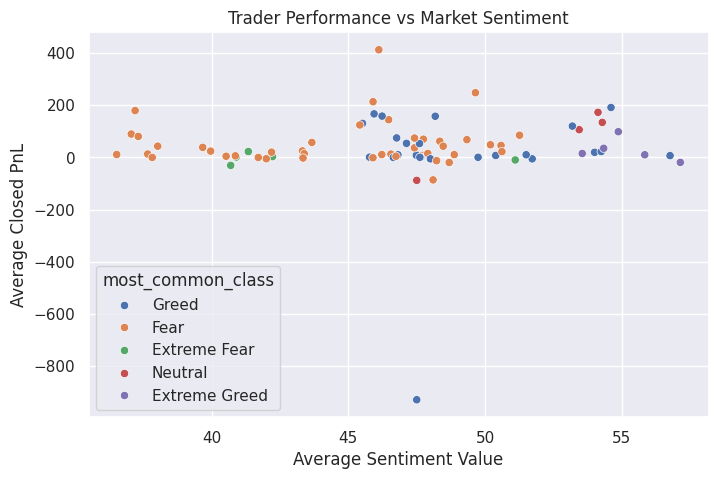

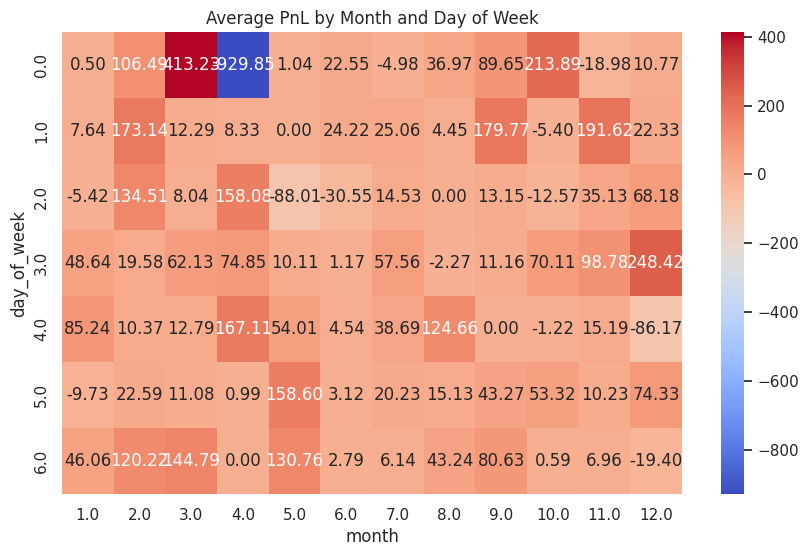

  classification    avg_pnl  total_trades  total_volume_usd
0   Extreme Fear   8.951448          2326        9580240.04
1  Extreme Greed  46.834938          5621       18223760.27
2           Fear  56.312059         13869       79674391.06
3          Greed  29.148125         11292       57045815.74
4        Neutral  28.283112          2756       11939551.21


In [57]:
import pandas as pd

trader_df = pd.read_csv('/content/drive/MyDrive/ds_Bhuvana/csv_files/historical_data.csv')

# Load sentiment data
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_Bhuvana/csv_files/fear_greed_index.csv')

# Convert Timestamp IST (string) → datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

# Create a Date column for grouping
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

# Quick check
print(trader_df[['Timestamp IST', 'Date']].head())

# See column names
#print(trader_df.columns)

# Peek at first rows
#print(trader_df.head())



# See column names
print(sentiment_df.columns)

#Peek at first rows
print(sentiment_df.head())

# Convert to datetime
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Drop old lowercase 'date' column if not needed
sentiment_df.drop(columns=['date'], inplace=True)

# Quick check
print(sentiment_df.head())



# Make sure date is in proper datetime format
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST']).dt.date

# Extract pattern features
trader_df['month'] = pd.to_datetime(trader_df['Date']).dt.month
trader_df['day_of_week'] = pd.to_datetime(trader_df['Date']).dt.dayofweek
trader_df['hour'] = pd.to_datetime(trader_df['Timestamp IST']).dt.hour

# Quick check
print(trader_df.head())




# Extract same pattern features
sentiment_df['month'] = pd.to_datetime(sentiment_df['Date']).dt.month
sentiment_df['day_of_week'] = pd.to_datetime(sentiment_df['Date']).dt.dayofweek
sentiment_df['hour'] = pd.to_datetime(trader_df['Timestamp IST']).dt.hour

# Quick check
print(sentiment_df.head())


trader_perf = trader_df.groupby(['month', 'day_of_week']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_trades=('Account', 'count')
).reset_index()

# Aggregate daily
daily_stats = trader_df.groupby('Date').agg(
    num_trades=('Account', 'count'),
    total_volume_usd=('Size USD', 'sum'),
    avg_pnl=('Closed PnL', 'mean')
).reset_index()

print(trader_perf.head())

sentiment_pattern = sentiment_df.groupby(['month', 'day_of_week']).agg(
    avg_sentiment_value=('value', 'mean'),
    most_common_class=('classification', lambda x: x.mode()[0])
).reset_index()

print(sentiment_pattern.head())


merged_patterns = pd.merge(
    trader_perf,
    sentiment_pattern,
    on=['month', 'day_of_week'],
    how='inner'
)
print(merged_patterns.head())




import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between sentiment value and avg PnL
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=merged_patterns,
    x='avg_sentiment_value',
    y='avg_pnl',
    hue='most_common_class'
)
plt.title('Trader Performance vs Market Sentiment')
plt.xlabel('Average Sentiment Value')
plt.ylabel('Average Closed PnL')
plt.show()

# Optional: heatmap by month & day_of_week
pivot_table = merged_patterns.pivot(index='day_of_week', columns='month',values= 'avg_pnl')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average PnL by Month and Day of Week')
plt.show()




# Merge on Date
merged_sentiment = pd.merge(
    daily_stats,                              # trader stats
    sentiment_df[['Date', 'classification']], # sentiment data
    on='Date',
    how='left'
)


# Group by sentiment classification
sentiment_perf = merged_sentiment.groupby('classification').agg(
    avg_pnl=('avg_pnl', 'mean'),
    total_trades=('num_trades', 'sum'),
    total_volume_usd=('total_volume_usd', 'sum')
).reset_index()

print(sentiment_perf)





# New Section